In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from pathlib import Path
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

In [2]:
dataset_path = Path(r"../data/blue_waters_posix_with_paths_no_negative_outliers_no_time_witherrors.csv")

In [3]:
df_no_outliers = pd.read_csv(dataset_path)

In [4]:
len(df_no_outliers)

820701

In [5]:
df_no_outliers.head()

index  POSIX_OPENS  POSIX_FILENOS  POSIX_DUPS  POSIX_READS  POSIX_WRITES  \
0      0         1280          -1281       -1281         1807             0   
1      1       168420          -5232       -5232      7505724       5401751   
2      2        62567          -1477       -1477      2300215        441912   
3      3         2366          -2367       -2367         3342             0   
4      4         8709           -288        -288      1521073       6331589   

   POSIX_SEEKS  POSIX_STATS  POSIX_MMAPS  POSIX_FSYNCS  ...  WRITE_100M_1G  \
0            0         2561            0             0  ...              0   
1     11345341       394840            0             1  ...              0   
2      1214829       280660            0             1  ...              0   
3            0         4733            0             0  ...              0   
4      2013343        28430            0             0  ...              0   

   WRITE_1G_PLUS  rank  POSIX_TOTAL_TIME  nprocs                          exe  \
0              0   184          0.970498     213                       Hsigma   
1              0     0        147.540409      80                         SpEC   
2              0    -1         24.994056      48                         SpEC   
3              0   127          0.487127     394                       Hsigma   
4              0    -1      14389.735087     256  CCTM_v52_Linux2_x86_64intel   

   lustre                                               path     error  \
0       1  /hpcwork/noco0056/io_transfer_learning/data/bl...  0.190429   
1       1  /hpcwork/noco0056/io_transfer_learning/data/bl...  0.000000   
2       1  /hpcwork/noco0056/io_transfer_learning/data/bl...  0.000000   
3       1  /hpcwork/noco0056/io_transfer_learning/data/bl... -0.104674   
4       1  /hpcwork/noco0056/io_transfer_learning/data/bl...  0.000000   

       mean  
0  0.780068  
1       NaN  
2       NaN  
3  0.591801  
4       NaN  

[5 rows x 96 columns]

In [6]:
df_no_outliers.exe.unique()

array(['Hsigma', 'SpEC', 'CCTM_v52_Linux2_x86_64intel', 'exec', 'mdtest',
       'ph.x', 'nek5000', 'ior', 'init_atmosphere_model',
       'ApplyObservers', 'volumeStats', 'pw.x', 'real.exe',
       'CutGridFlow_parallel', 'curvdns', 'enzo.exe', 'ppm_vortex',
       'quickpic_pipe.exe', 'bands.x', 'scheduler.x', 'ph5example',
       'harm3d', 'Radiate08', 'zeusmpi', 'Radiate10', 'vasp_ncl', 'vasp',
       'mctas_wrapper', 'runRSQSim', 'emod3d-mpi', 'coawstM', 'caliop',
       'vasp54withoutneb', 'run', 'lmp_new', 'wrf.exe',
       'iobubble_sicpr300d2p5nobub', 'vasp_std',
       'bubble_sicpr300d2p5nobub', 'iobubble_sicpr300d2p5',
       'bubble_sicpr300d2p5', 'iobubble_res32', 'bubble_sicpr300res32',
       'iobubble_res80', 'penc_comm_CAF.x', 'comm_penc_CAF.x',
       'lmp_xe6_kc_s', 'bubble_rcpr20h2816w', 'bubble_rcpr100h2016w',
       'bubble_rcpr100h2816w', 'bubble_rcpr20h2416w',
       'bubble_rcpr20h2016w', 'bubble_rcpr20h1716w',
       'bubble_rcpr100h1916w', 'bubble_rcpr50h281

Most used applications:
- SpEC: Standard Performance Evaluation Corporation, benchmark
- Flash4 physics simulation
- pw.x: Quantum Espresso
- VASP: atomic scale materials modelling, e.g. electronic structure calculations and quantum-mechanical molecular dynamics

In [7]:
df_no_outliers.groupby(by=["exe"]).count()["nprocs"].sort_values(ascending=False).head(10)

exe
SpEC                           340845
CCTM_v52_Linux2_x86_64intel     85993
mosst_dynamo.x                  69537
vasp_gam                        65420
Spells                          40653
pw.x                            28629
enzo.exe                        27974
ApplyObservers                  27272
flash4                          24022
scheduler.x                     15058
Name: nprocs, dtype: int64

In [8]:
most_used_apps = df_no_outliers.groupby(by=["exe"]).count()["nprocs"].sort_values(ascending=False)
len(most_used_apps.index)

906

([<matplotlib.patches.Wedge at 0x1c601b1d1d0>,
 [Text(1.052015202618404, 0.32134718523702477, 'SpEC'),
  Text(0.4962291440433025, 0.9817110759291919, 'CCTM_v52_Linux2_x86_64intel'),
  Text(-0.48256139063091247, 0.9885011402483864, 'mosst_dynamo.x'),
  Text(-1.0453725348821892, 0.3423393978407773, 'vasp_gam'),
  Text(-1.0467423008146652, -0.33812801671145376, 'Spells'),
  Text(0.30054618449791826, -1.0581455433841527, 'other')])

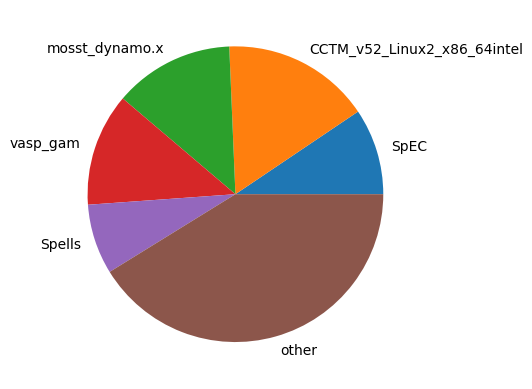

In [10]:
apps_to_plot = most_used_apps[0:5]
apps_to_plot["SpEC"] = 50000
apps_to_plot["other"] = most_used_apps[5:].sum()
apps_to_plot.name = "counts"
apps_to_plot.index
fig, ax = plt.subplots()
ax.pie(apps_to_plot,labels=apps_to_plot.index)

In [11]:
len(df_no_outliers["mean"].unique())

25056

Text(0, 0.5, 'number of sets')

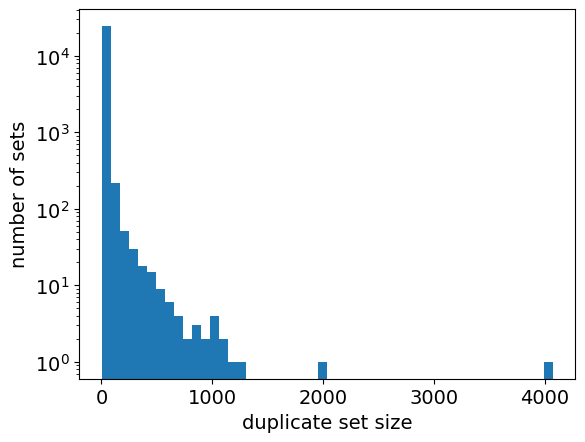

In [12]:
plt.rcParams.update({'font.size': 14})
mean_counts = pd.DataFrame(df_no_outliers["mean"]).groupby("mean",dropna=True)["mean"].count()
fig, ax = plt.subplots()
ax.hist(mean_counts.values,bins=50,log=True)
ax.set_xlabel("duplicate set size")
ax.set_ylabel("number of sets")

<Axes: xlabel='POSIX_TOTAL_TIME'>

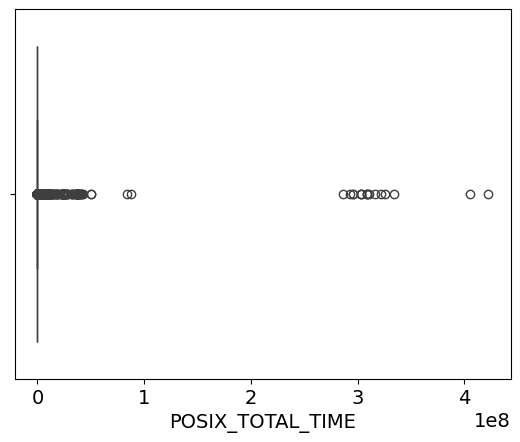

In [13]:
sns.boxplot(x=df_no_outliers.POSIX_TOTAL_TIME)

In [14]:
df_no_outliers.describe().transpose()

count          mean           std           min  \
index             820701.0  4.103500e+05  2.369161e+05  0.000000e+00   
POSIX_OPENS       820701.0  2.733072e+04  8.899390e+05  0.000000e+00   
POSIX_FILENOS     820701.0 -1.680470e+03  2.904335e+04 -3.933124e+06   
POSIX_DUPS        820701.0 -1.680470e+03  2.904335e+04 -3.933124e+06   
POSIX_READS       820701.0  2.458676e+06  7.862124e+07  0.000000e+00   
...                    ...           ...           ...           ...   
POSIX_TOTAL_TIME  820701.0  1.582663e+04  1.513705e+06  1.096725e-05   
nprocs            820701.0  1.673966e+02  2.328638e+03  1.000000e+00   
lustre            820701.0  9.884440e-01  1.068759e-01  0.000000e+00   
error             820701.0  2.060486e-15  3.249293e+03 -1.855642e+06   
mean              241735.0  8.179435e+02  5.523258e+04  1.204014e-05   

                            25%           50%           75%           max  
index             205175.000000  410350.00000  6.155250e+05  8.207000e+05  
POSIX_OPENS          215.000000    5543.00000  1.695400e+04  5.531094e+08  
POSIX_FILENOS       -994.000000    -288.00000 -2.000000e+01 -1.000000e+00  
POSIX_DUPS          -994.000000    -288.00000 -2.000000e+01 -1.000000e+00  
POSIX_READS        27281.000000  249379.00000  1.558014e+06  2.237846e+10  
...                         ...           ...           ...           ...  
POSIX_TOTAL_TIME       7.952037      44.37264  1.821327e+02  4.223457e+08  
nprocs                16.000000      48.00000  6.400000e+01  4.298240e+05  
lustre                 1.000000       1.00000  1.000000e+00  1.000000e+00  
error                  0.000000       0.00000  0.000000e+00  1.855642e+06  
mean                   0.965467       7.93822  7.964299e+01  5.346436e+06  

[94 rows x 8 columns]

In [15]:
bytes_read_copy = df_no_outliers.POSIX_BYTES_READ.copy().where(df_no_outliers.POSIX_BYTES_READ > 0,0.1)
bytes_written_copy = df_no_outliers.POSIX_BYTES_WRITTEN.copy().where(df_no_outliers.POSIX_BYTES_WRITTEN > 0,0.1)

In [16]:
def plot_df_w_filter(df,filterexp,x_column,coord,color_data=bytes_read_copy,cmap="viridis"):
    sc = coord.scatter(x=df[filterexp][x_column],y=df[filterexp]["POSIX_TOTAL_TIME"], c=np.log10(color_data[filterexp]),cmap=cmap)
    coord.set_xscale("log")
    coord.set_yscale("log")
    coord.set_xlabel(x_column)
    coord.set_ylabel("POSIX_TOTAL_TIME")
    return sc

In [17]:
def plot_mosaic(filter_spec,filename):
    plt.rcParams.update({'font.size': 25})
    fig, axs = plt.subplots(nrows = 1, ncols=2, figsize=(30, 10))
    plt.subplots_adjust(wspace=0.26)
    sc_read = plot_df_w_filter(df_no_outliers,filter_spec,"POSIX_READS",axs[0])
    sc_written = plot_df_w_filter(df_no_outliers,filter_spec,"POSIX_WRITES",axs[1],bytes_written_copy,"plasma")
    divider = make_axes_locatable(axs[0])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(sc_read, cax=cax, orientation='vertical',label="POSIX_BYTES_READ")
    divider = make_axes_locatable(axs[1])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(sc_written, cax=cax, orientation='vertical',label="POSIX_BYTES_WRITTEN")
    plt.show()

In [18]:
most_used_apps[0:20]

exe
SpEC                           50000
CCTM_v52_Linux2_x86_64intel    85993
mosst_dynamo.x                 69537
vasp_gam                       65420
Spells                         40653
pw.x                           28629
enzo.exe                       27974
ApplyObservers                 27272
flash4                         24022
scheduler.x                    15058
lmp_new                        12817
ior                             7027
caliop                          6589
mdtest                          6563
sord-mO                         5240
PIOL-FFD                        5160
Hsigma                          3568
nwchem                          3339
nek5000                         3232
h_r_f                           2762
Name: nprocs, dtype: int64

In [ ]:
df_no_outliers[df_no_outliers.exe == "Spells"].describe()

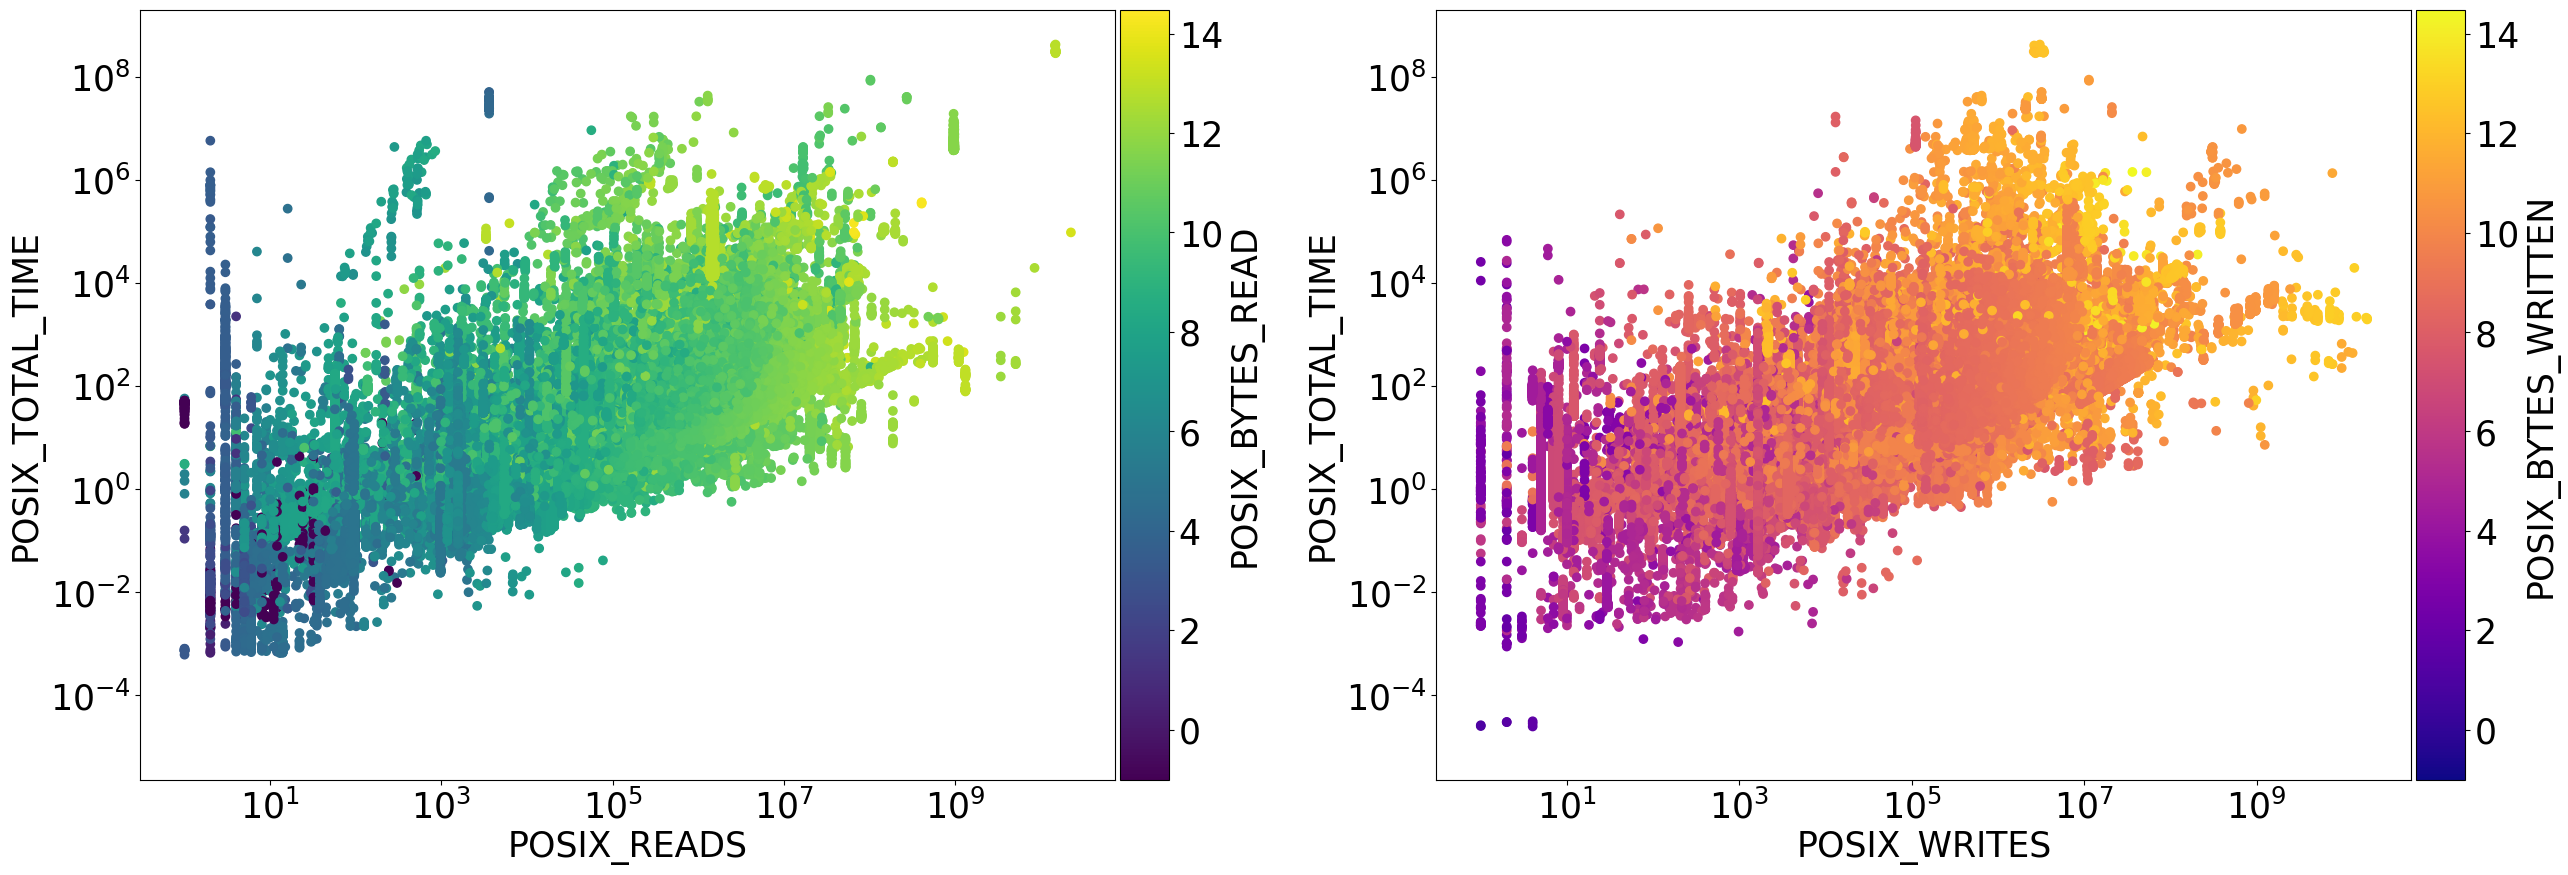

In [22]:
filter_spec = df_no_outliers.exe.isin(most_used_apps[0:5])
plot_mosaic((filter_spec == False) | (filter_spec == True),"blue_waters_understand_no_IQR_all")

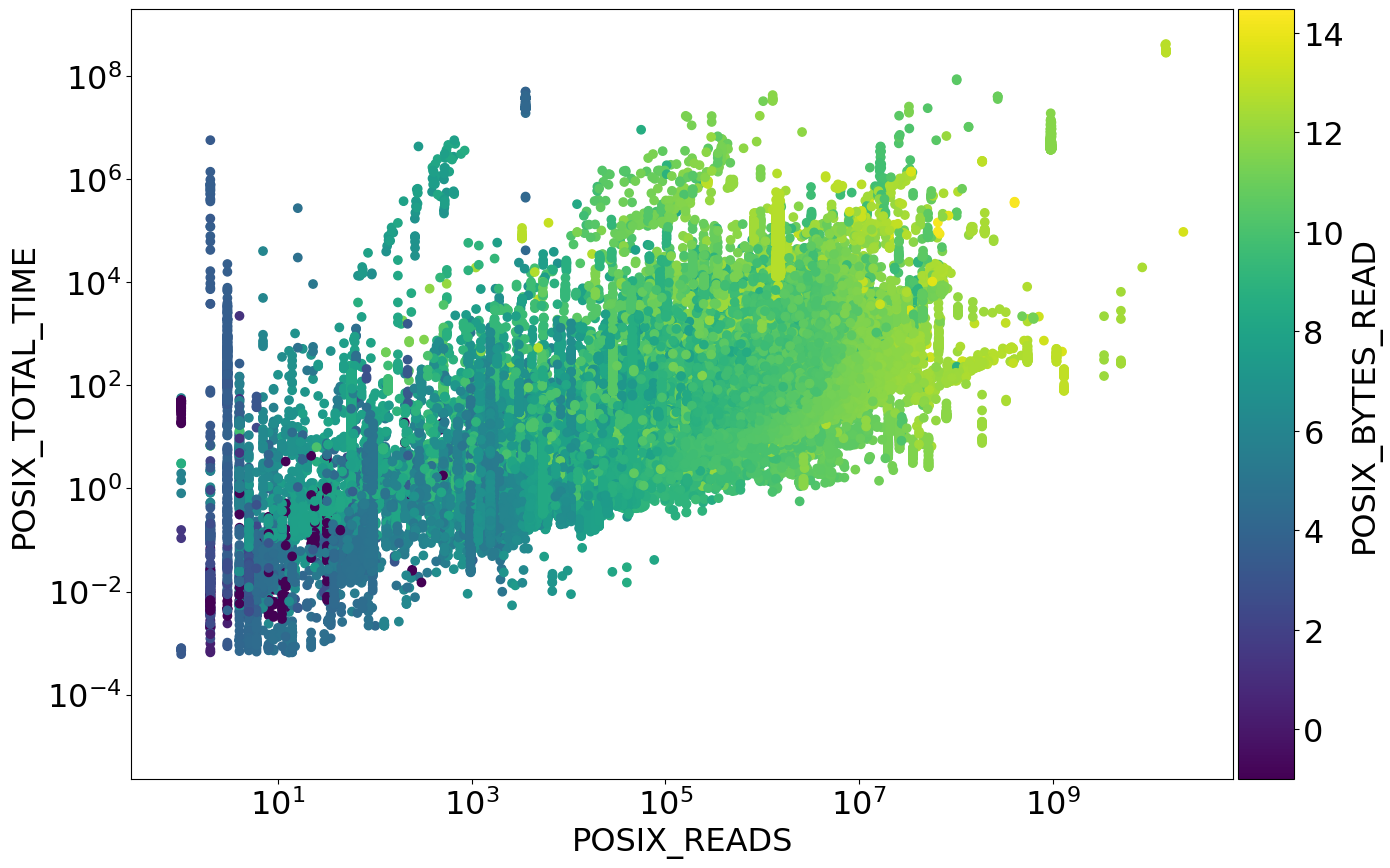

In [25]:
plt.rcParams.update({'font.size': 23})
filter_spec = df_no_outliers.exe.isin(most_used_apps[0:5])
fig, axs = plt.subplots(nrows = 1, ncols=1, figsize=(15, 10))
plt.subplots_adjust(wspace=0.26)
sc_read = plot_df_w_filter(df_no_outliers,(filter_spec == False) | (filter_spec == True),"POSIX_READS",axs)
divider = make_axes_locatable(axs)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(sc_read, cax=cax, orientation='vertical',label="POSIX_BYTES_READ")
plt.show()

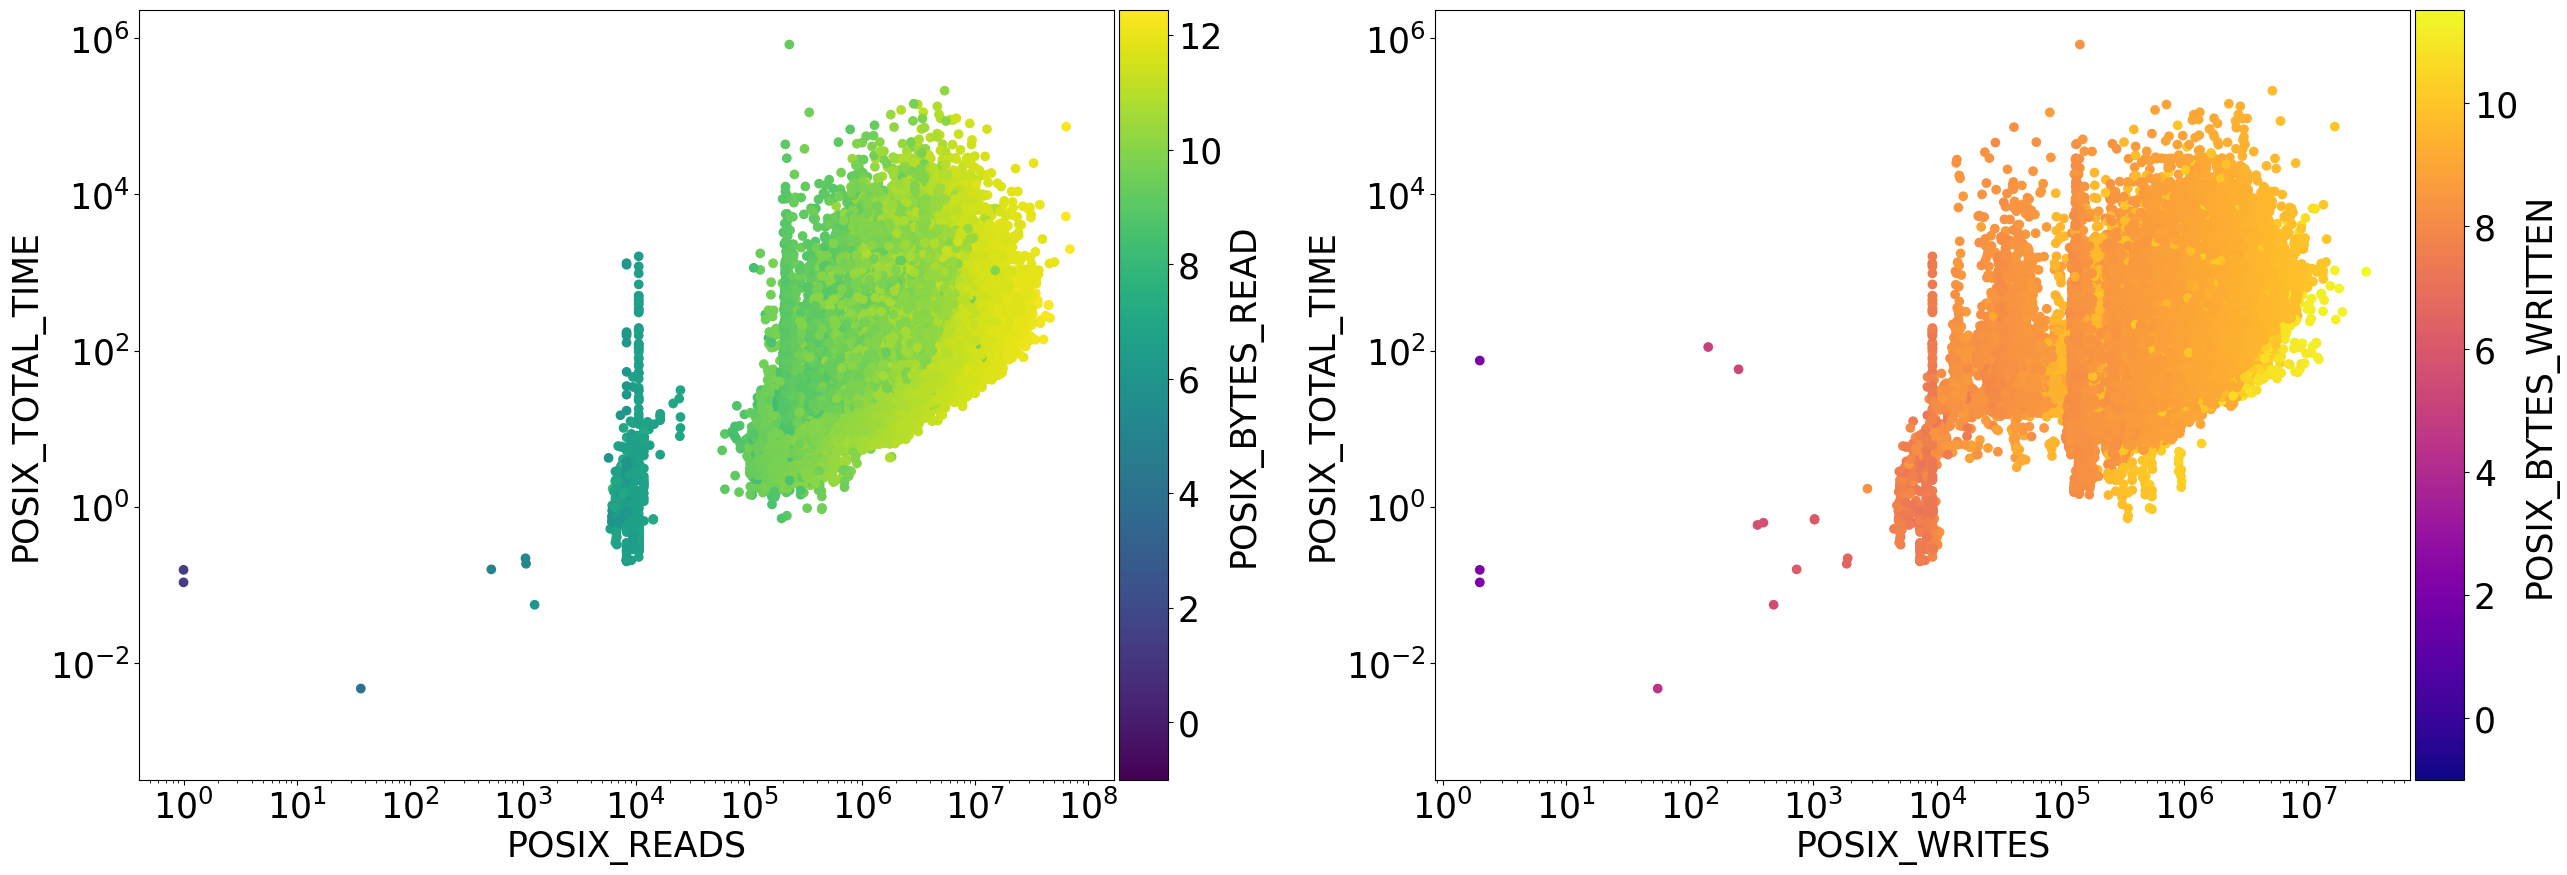

In [27]:
filter_spec = (df_no_outliers.exe == "SpEC")
plot_mosaic(filter_spec == True,"blue_waters_understand_no_IQR_SpEC_small")

In at least 30% of the rows the rank is 0 or -1, possibly not known?

In [28]:
len(df_no_outliers["rank"][df_no_outliers["rank"] == -1]) / len(df_no_outliers)

0.6054141520480663

In [29]:
len(df_no_outliers["rank"][df_no_outliers["rank"] == 0]) / len(df_no_outliers)

0.281940682416617